### - Sobhan Moradian Daghigh
#### - 5/3/2022
#### - DIP - HW02 - Q2

In [339]:
import numpy as np
from PIL import Image, ImageFilter
import cv2
from IPython.display import display
import glob
from matplotlib import pyplot as plt

In [17]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)      
        names.append(image.split('\\')[1][:-4])
    return datas, names

In [158]:
def bitplane_slice(img, bits=3):
    fig, axes = plt.subplots(2, 4, figsize=(20, 8))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    planed = []
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            planed.append(np.binary_repr(img[i, j], width=bits))
    
    planes = []
    for bit, ax in zip(range(bits), axes.reshape(-1)):
        plane = (np.array([int(plane_bits[bits - bit - 1]) for plane_bits in planed], dtype=np.uint8)).reshape(img.shape)
        planes.append(plane)
        ax.imshow(plane, cmap='gray')
        ax.set_title('Bit plane {}'.format(bit + 1))
        ax.axis('off')
    plt.show()
    return planes

In [159]:
def xor(frames1, frames2):
    fig, axes = plt.subplots(2, 4, figsize=(20, 8))
    results = []
    for i, (f1, f2, ax) in enumerate(zip(frames1, frames2, axes.reshape(-1))):
        result = cv2.bitwise_xor(f1, f2)
        results.append(result)
        ax.imshow(result, cmap='gray')
        ax.set_title('frame1 XOR frame2 for Bit plane {}'.format(i + 1))
        ax.axis('off')
    plt.show()
    return results

In [169]:
def merger(frames, count=4):
    blank = np.zeros(frames[0].shape)
    for i, frame in enumerate(frames[count:]):
        blank += np.multiply(frame, np.power(2, len(frames) - count + i))
        
    plt.imshow(blank, cmap='gray')
    plt.axis('off')
    plt.show()
    return blank

In [175]:
imgs, names = load_datas('./inputs/P2/')

Bit Planes for football_f1_01


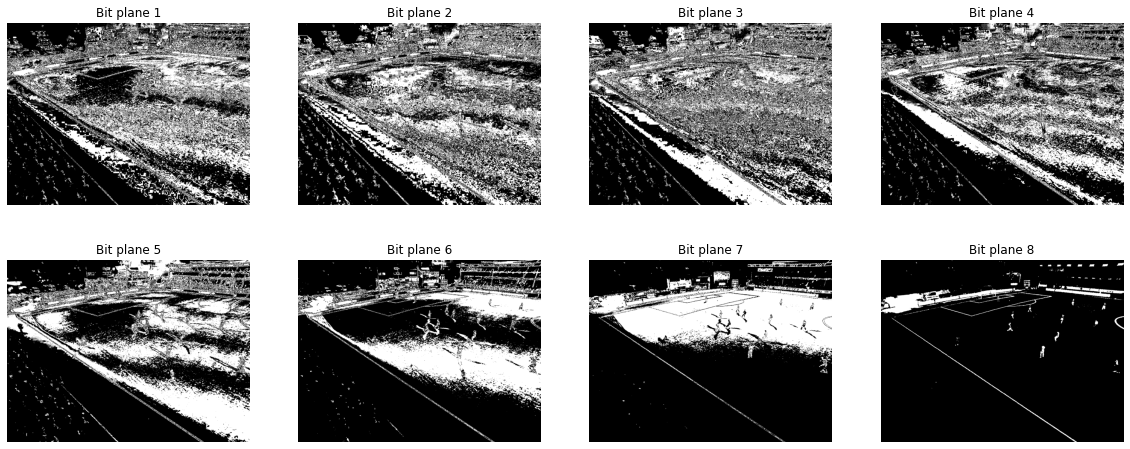

Bit Planes for football_f1_02


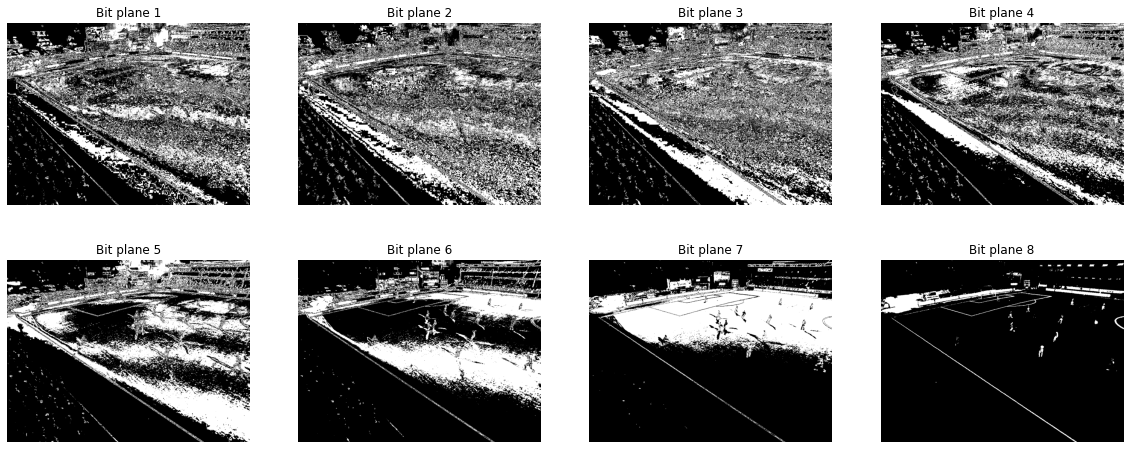

XOR for football_f1


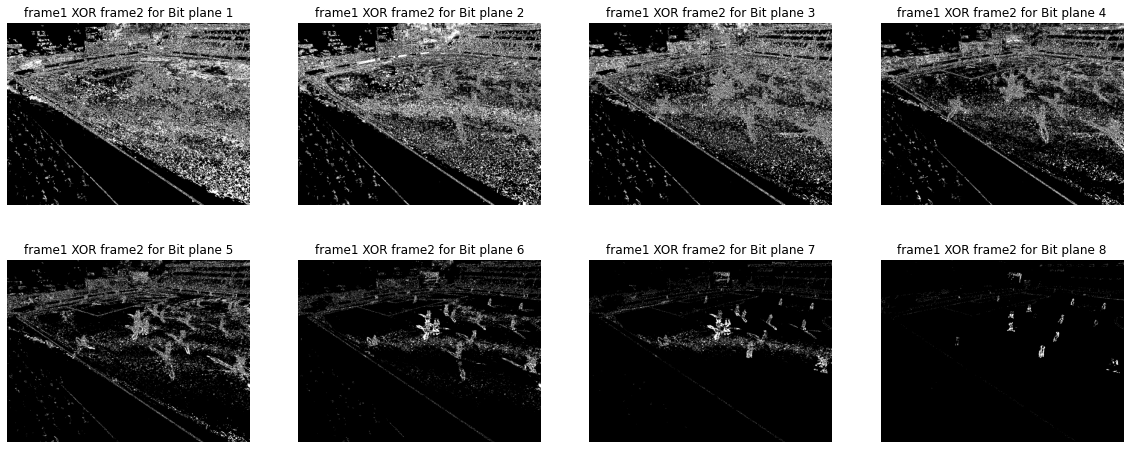

Merged grayscale for football_f1


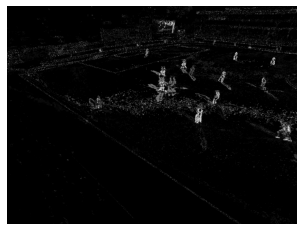

Bit Planes for football_f2_01


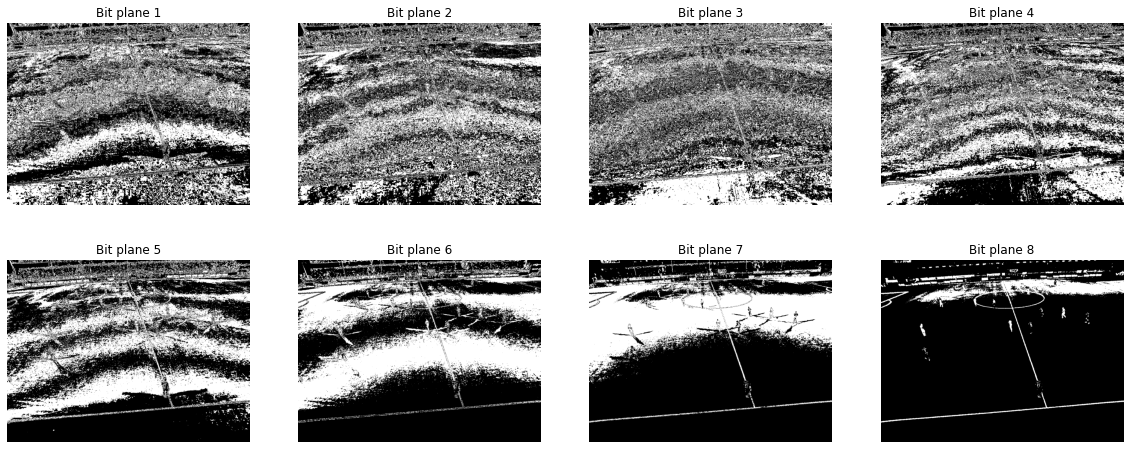

Bit Planes for football_f2_02


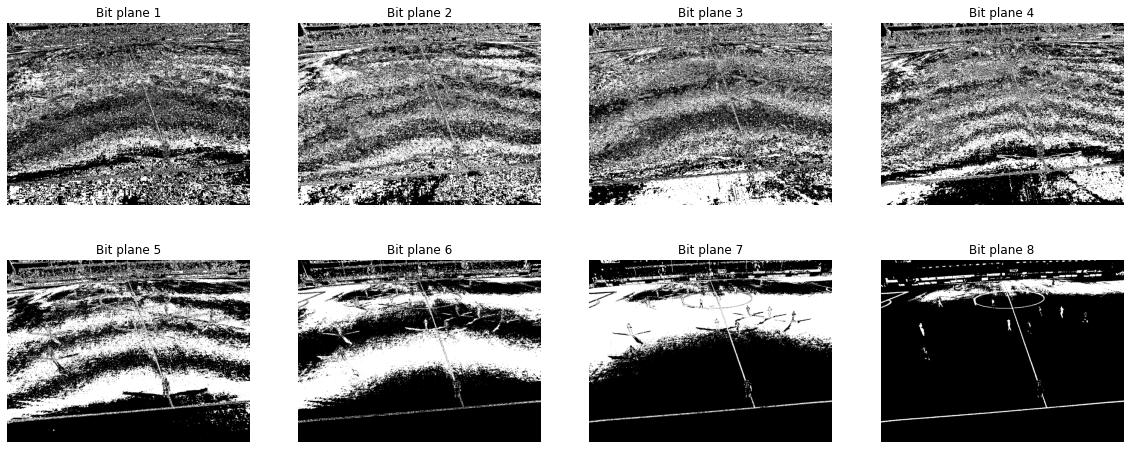

XOR for football_f2


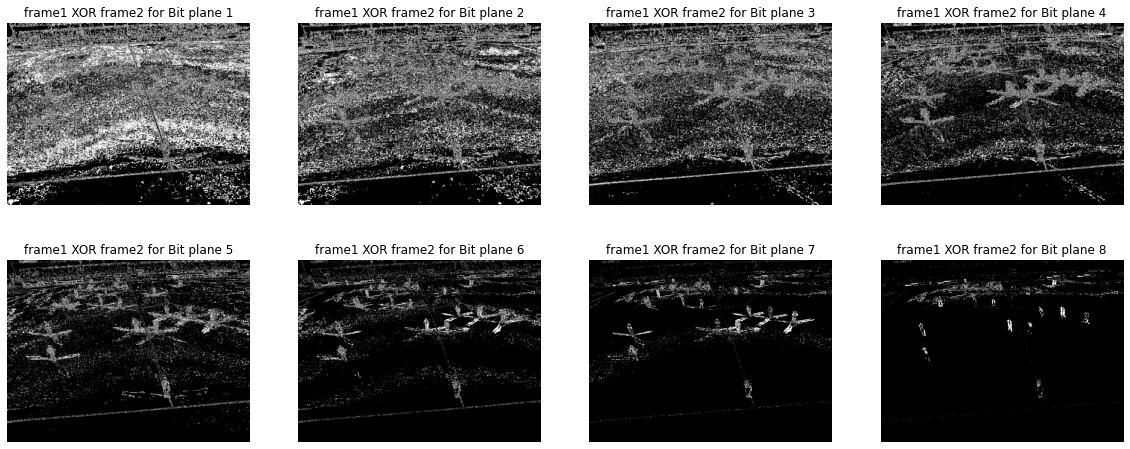

Merged grayscale for football_f2


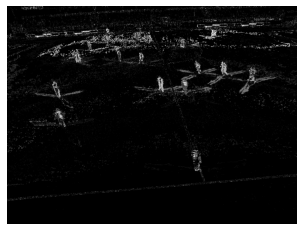

Bit Planes for football_f3_01


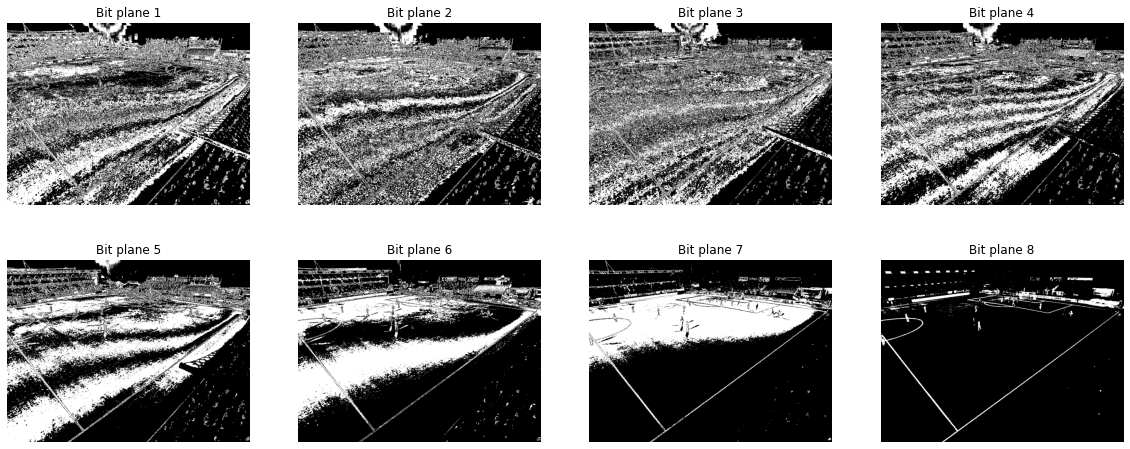

Bit Planes for football_f3_02


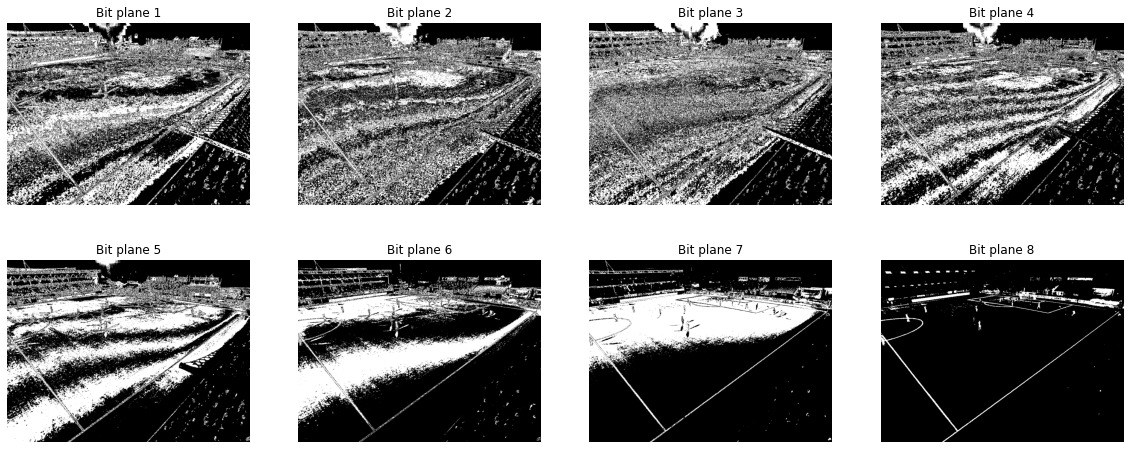

XOR for football_f3


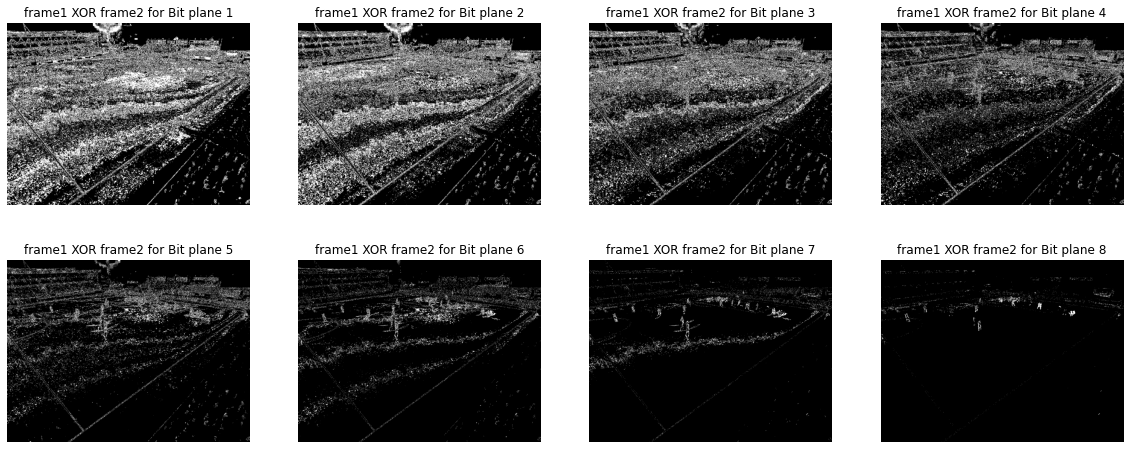

Merged grayscale for football_f3


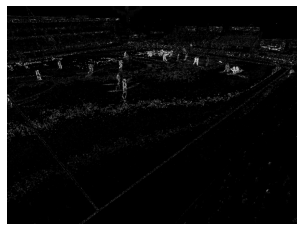

In [365]:
merges = []
for i in range(0, len(imgs), 2):
    print('Bit Planes for {}'.format(names[i]))
    planes1 = bitplane_slice(imgs[i], bits=8)
    
    print('Bit Planes for {}'.format(names[i + 1]))
    planes2 = bitplane_slice(imgs[i + 1], bits=8)
    
    print('XOR for {}'.format(names[i][:-3]))
    results = xor(planes1, planes2)
    
    # merge 4 highest bit-planes
    print('Merged grayscale for {}'.format(names[i][:-3]))
    merge = merger(results, count=4)
    merges.append(merge)

### Part D.

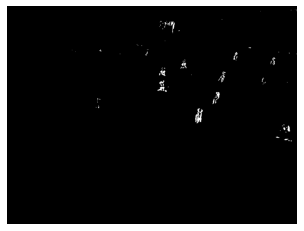

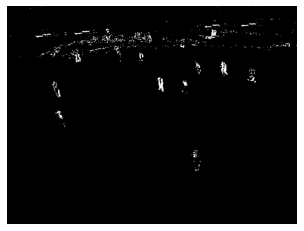

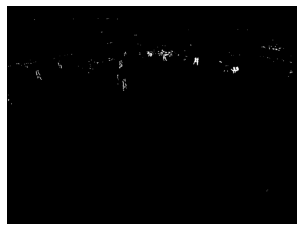

In [366]:
for merge in merges:
    enhanced = cv2.inRange(merge, 120, 255)
    _, enhanced = cv2.threshold(enhanced, 0, 1, cv2.THRESH_BINARY)
    enhanced = Image.fromarray(enhanced).filter(ImageFilter.GaussianBlur)
    plt.imshow(enhanced, cmap='gray')
    plt.axis('off')
    plt.show()

### Finito